In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from scipy.stats import f_oneway, chi2_contingency


In [2]:
df = pd.read_csv('house_prices.csv')

### What is the average price of properties in the dataset?

## Overview

In [3]:
average_price = df['price'].mean()
print(f"Average Price of Properties: Rs{average_price:.2f}")

Average Price of Properties: Rs10375919.50


### What is the distribution of property types?

In [4]:
property_type_distribution = df['property_type'].value_counts()
print("\nDistribution of Property Types:")
print(property_type_distribution)


Distribution of Property Types:
House            58169
Flat             26658
Upper Portion     8539
Lower Portion     5549
Penthouse          255
Room               241
Farm House          88
Name: property_type, dtype: int64


### How many properties are listed for sale, and in which cities?

In [5]:
properties_for_sale = df[df['purpose'] == 'For Sale']
 
total_properties_for_sale = len(properties_for_sale)
print("\nProperties listed for sale:")
print(f"Total properties for sale: {total_properties_for_sale}")

properties_by_city = properties_for_sale.groupby('city').size().reset_index(name='properties_count')
print("\nProperties for sale in each city:")
print(properties_by_city)



Properties listed for sale:
Total properties for sale: 70947

Properties for sale in each city:
         city  properties_count
0  Faisalabad              1611
1   Islamabad              8794
2     Karachi             27210
3      Lahore             26221
4  Rawalpindi              7111


## Location Analysis:

### Which locations have the highest and lowest average property prices?

In [6]:
average_price_by_location = df.groupby('location')['price'].mean().sort_values(ascending=False)
highest_avg_price_location = average_price_by_location.idxmax()
lowest_avg_price_location = average_price_by_location.idxmin()

print(f"Highest average price location: {highest_avg_price_location} (Average Price: Rs{average_price_by_location.max():.2f})")
print(f"Lowest average price location: {lowest_avg_price_location} (Average Price: Rs{average_price_by_location.min():.2f})")




Highest average price location: TECH Society (Average Price: Rs42500000.00)
Lowest average price location: Beaumont Road (Average Price: Rs16000.00)


### What are the most popular locations based on the number of listings?

In [7]:
locations_by_listings = df['location'].value_counts()
most_popular_locations = locations_by_listings.head(5)
print("\nMost popular locations based on the number of listings:")
print(most_popular_locations)


Most popular locations based on the number of listings:
DHA Defence               11787
Bahria Town Karachi        6697
Bahria Town Rawalpindi     5257
Bahria Town                4437
Gulistan-e-Jauhar          3532
Name: location, dtype: int64


## Property Characteristics

### What is the average number of bedrooms and bathrooms for listed properties?

In [8]:
average_bedrooms = df['bedrooms'].mean()
average_bathrooms = df['baths'].mean()

print(f"Average number of bedrooms: {average_bedrooms:.2f}")
print(f"Average number of bathrooms: {average_bathrooms:.2f}")





Average number of bedrooms: 3.35
Average number of bathrooms: 3.53


### How does property size vary across different types and locations?

In [9]:
average_area_by_type_location = df.groupby(['property_type', 'location'])['Area_in_Marla'].mean().reset_index()
print(average_area_by_type_location)

      property_type        location  Area_in_Marla
0        Farm House      7th Avenue      60.000000
1        Farm House     Adiala Road     160.000000
2        Farm House   Al-Kabir Town       4.000000
3        Farm House            B-17      20.000000
4        Farm House  Bahria Orchard      80.000000
...             ...             ...            ...
2438  Upper Portion      Wapda Town      10.000000
2439  Upper Portion       Westridge      14.363636
2440  Upper Portion      Youhanabad       2.500000
2441  Upper Portion   Yousaf Colony       9.000000
2442  Upper Portion         Zamzama      20.000000

[2443 rows x 3 columns]


## Price Analysis

###  Are there outliers or high-value properties in the dataset?


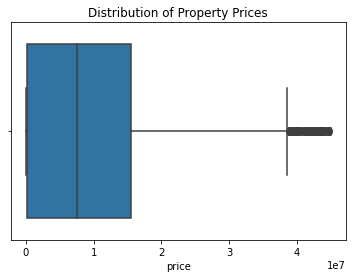


Correlation Matrix:
             price  bedrooms     baths
price     1.000000  0.464393  0.496222
bedrooms  0.464393  1.000000  0.863885
baths     0.496222  0.863885  1.000000


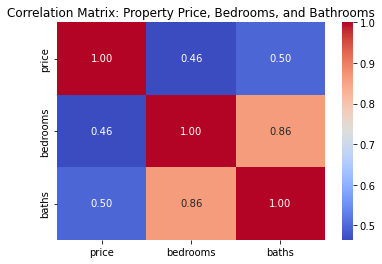

In [10]:
# outliers
sns.boxplot(x='price', data=df)
plt.title("Distribution of Property Prices")
plt.show()

correlation_matrix = df[['price', 'bedrooms', 'baths']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Property Price, Bedrooms, and Bathrooms")
plt.show()


## City Comparison

### Question: How do property prices differ between cities?


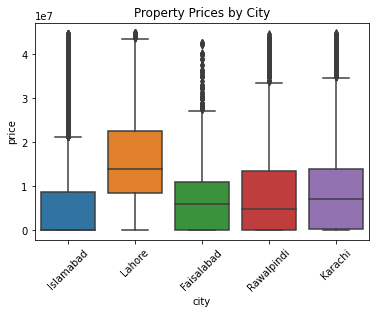

In [11]:
sns.boxplot(x='city', y='price', data=df)
plt.title("Property Prices by City")
plt.xticks(rotation=45)
plt.show()

### Are there specific property types more common in certain cities?

In [12]:
property_type_by_city = df.groupby(['city', 'property_type']).size().unstack(fill_value=0)
property_type_by_city_percentage = property_type_by_city.div(property_type_by_city.sum(axis=1), axis=0) * 100

print(property_type_by_city_percentage)


property_type  Farm House       Flat      House  Lower Portion  Penthouse  \
city                                                                        
Faisalabad       0.089646   0.717167  88.614971       3.809951   0.089646   
Islamabad        0.089916  22.559906  46.828216      12.884953   0.166344   
Karachi          0.053958  50.593536  34.624723       4.877786   0.553068   
Lahore           0.144922   5.106594  94.363297       0.137295   0.015255   
Rawalpindi       0.068155  13.051627  69.850060       6.423582   0.059635   

property_type      Room  Upper Portion  
city                                    
Faisalabad     0.448229       6.230390  
Islamabad      0.683361      16.787304  
Karachi        0.183457       9.113473  
Lahore         0.019069       0.213569  
Rawalpindi     0.051116      10.495826  


## Purpose of Listings:


### Distribution of properties based on purpose


In [13]:
purpose_distribution = df['purpose'].value_counts()

print(purpose_distribution)

For Sale    70947
For Rent    28552
Name: purpose, dtype: int64


### How does the average price vary between different purposes?


Average price by purpose:
purpose
For Sale    1.451733e+07
For Rent    8.518902e+04
Name: price, dtype: float64


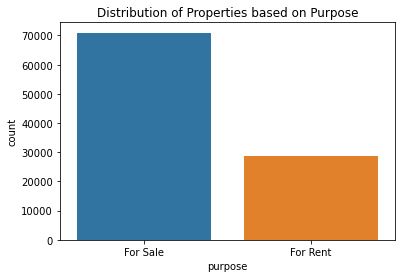

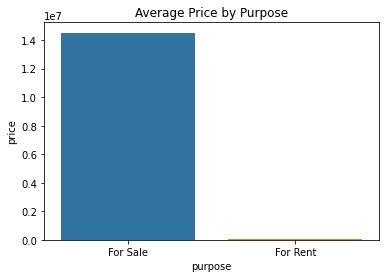

In [14]:
average_price_by_purpose = df.groupby('purpose')['price'].mean().sort_values(ascending=False)

print("\nAverage price by purpose:")
print(average_price_by_purpose)

# Visualization
sns.countplot(x='purpose', data=df)
plt.title("Distribution of Properties based on Purpose")
plt.show()

sns.barplot(x='purpose', y='price', data=df, ci=None)
plt.title("Average Price by Purpose")
plt.show()



## Specific Property Types:


### What is the average price and size of flats in the dataset?

In [15]:
average_price_flat = df[df['property_type'] == 'flat']['price'].mean()
average_size_flat = df[df['property_type'] == 'flat']['Area_in_Marla'].mean()

print(f"Average price of flats: Rs{average_price_flat:.2f}")
print(f"Average size of flats: {average_size_flat:.2f} Marla")


Average price of flats: Rsnan
Average size of flats: nan Marla


### Are there trends or patterns specific to flats, houses, or other property types?

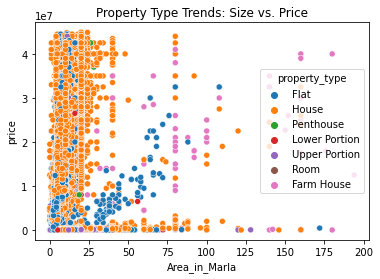

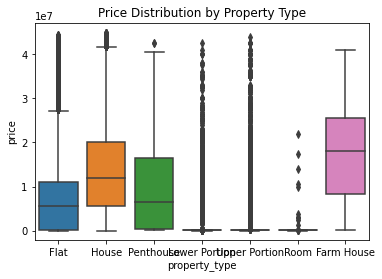

In [16]:
sns.scatterplot(x='Area_in_Marla', y='price', hue='property_type', data=df)
plt.title("Property Type Trends: Size vs. Price")
plt.show()

sns.boxplot(x='property_type', y='price', data=df)
plt.title("Price Distribution by Property Type")
plt.show()


## Popular Locations and Property Types:


Popular locations based on the number of listings:
DHA Defence               11787
Bahria Town Karachi        6697
Bahria Town Rawalpindi     5257
Bahria Town                4437
Gulistan-e-Jauhar          3532
Name: location, dtype: int64

Property types distribution in popular locations:
House            18437
Flat             10091
Upper Portion     1972
Lower Portion     1104
Room                61
Penthouse           41
Farm House           4
Name: property_type, dtype: int64


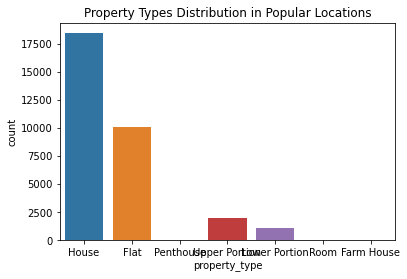

In [17]:
locations_by_listings = df['location'].value_counts()
popular_locations = locations_by_listings.head(5)

print("\nPopular locations based on the number of listings:")
print(popular_locations)

# Are certain property types more prevalent in popular locations?
property_types_in_popular_locations = df[df['location'].isin(popular_locations.index)]['property_type'].value_counts()

print("\nProperty types distribution in popular locations:")
print(property_types_in_popular_locations)


sns.countplot(x='property_type', data=df[df['location'].isin(popular_locations.index)])
plt.title("Property Types Distribution in Popular Locations")
plt.show()


## Testing of Hypothesis:

In [18]:
flats_df = df[df['property_type'] == 'Flat']

# ANOVA test
anova_results = f_oneway(*[flats_df[flats_df['city'] == city]['price'] for city in flats_df['city'].unique()])

if anova_results.pvalue < 0.05:
    print("There is a significant difference in average price across different cities.")
else:
    print("There is no significant difference in average price across different cities.")



There is a significant difference in average price across different cities.


In [19]:
# Is there any association between purpose and property type?
association_table = pd.crosstab(df['purpose'], df['property_type'], margins=True, margins_name='Total')

print("\nAssociation between purpose and property type:")
print(association_table)


Association between purpose and property type:
property_type  Farm House   Flat  House  Lower Portion  Penthouse  Room  \
purpose                                                                   
For Rent               13   7275   9147           4889         71   229   
For Sale               75  19383  49022            660        184    12   
Total                  88  26658  58169           5549        255   241   

property_type  Upper Portion  Total  
purpose                              
For Rent                6928  28552  
For Sale                1611  70947  
Total                   8539  99499  


In [20]:
# Perform chi-square test of independence
contingency_table = pd.crosstab(df['purpose'], df['property_type'])
chi2, p, _, _ = chi2_contingency(contingency_table)

if p < 0.05:
    print("There is a significant association between purpose and property type.")
else:
    print("There is no significant association between purpose and property type.")


There is a significant association between purpose and property type.


## Predictive Modeling:

In [21]:
# One-hot encoding
df = pd.get_dummies(df, columns=['location', 'property_type', 'city', 'purpose'], drop_first=True)


X = df.drop(columns=['price']) 
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)


# Predictions
linear_reg_predictions = linear_reg_model.predict(X_test)


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('house_prices.csv')

# Select features and target variable
X = df[['location', 'bedrooms', 'Area_in_Marla']]
y = df['price']


X = pd.get_dummies(X, columns=['location'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # RMSE
print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


R-squared (R2): -922385505381862784.0000
Root Mean Squared Error (RMSE): 10275059879753562.00


In [22]:
# Random Forest Regression model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)


RandomForestRegressor()

In [23]:
random_forest_predictions = random_forest_model.predict(X_test)

In [24]:
# Evaluate performance
def evaluate_model(predictions, model_name):
    r2 = r2_score(y_test, predictions)
    rmse = sqrt(mean_squared_error(y_test, predictions))
    print(f"\nPerformance of {model_name} Model:")
    print(f"R-squared (R2): {r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


In [25]:
evaluate_model(random_forest_predictions, random_forest_model)


Performance of RandomForestRegressor() Model:
R-squared (R2): 0.5474
Root Mean Squared Error (RMSE): 7197282.44
